# Email Spam Classification

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/heramb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/heramb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# dataset 1

In [5]:
#df1 = pd.read_csv("completeSpamAssassin.csv", encoding='utf-8', error_bad_lines=False)


In [6]:
df1 = pd.read_csv("completeSpamAssassin.csv", encoding='utf-8')


In [7]:
#df1 = pd.read_csv("completeSpamAssassin.csv")

In [8]:
df1.head(10)

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1
5,5,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,1
6,6,Help wanted. We are a 14 year old fortune 500...,1
7,7,ReliaQuote - Save Up To 70% On Life Insurance\...,1
8,8,TIRED OF THE BULL OUT THERE?\nWant To Stop Los...,1
9,9,"Dear ricardo1 ,\nCOST EFFECTIVE Direct Email A...",1


In [9]:
df1.sample(10)

,Unnamed: 0,Body,Label
3484,3484,Razor won't filter empty emails. What version ...,0
2285,2285,"Thanks Tony, but I think doing it using compon...",0
3405,3405,jm@jmason.org (Justin Mason) writes:> Yes -- 5...,0
4610,4610,>> I swear to god you have to be so carefull w...,0
4782,4782,"\n> > hmm, I've never used gentoo\n> > so I'l...",0
5767,5767,\nForwarded-by: Rob Windsor \nForwarded-by: LZ...,0
4176,4176,"URL: http://www.newsisfree.com/click/-5,855354...",0
725,725,\nHave you ever wondered how the hell these pe...,1
5148,5148,Interesting project involving geospatial data ...,0
1874,1874,empty,1


In [10]:
df1.shape

(6046, 3)

In [11]:
# dataset 2

In [12]:
df2 = pd.read_csv("spamemails.csv", encoding='utf-8')

In [13]:
df2.shape

(5572, 5)

## 1. Data Cleaning

In [14]:
 df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [15]:
df1.isnull().sum()

Unnamed: 0    0
Body          1
Label         0
dtype: int64

In [16]:
# Drop rows where 'Body' column is NaN or empty
df1.dropna(subset=['Body'], inplace=True)

In [17]:
df1.duplicated().sum()

0

In [18]:
df1.drop("Unnamed: 0", axis=1, inplace=True)

In [19]:
df1.sample(10)

,Body,Label
4754,Rick Moen wrote:\n> Don't like SuSE's product...,0
4372,\n[Paul Moore]\n> but let's walk before we ...,0
113,PoliceAuctions.coma:link{font-family:verdana;c...,1
358,OFFICE OF:EGNR. FEMI DANIEL\nFEDERAL MINISTRY ...,1
4973,I'm still seeing this. It reports to honor.cl...,0
5619,spamassassin-2.31-15.src.rpm is in RawHide. Ta...,0
870,Hello \nTHIS E-MAIL AD IS BEING SENT IN FULL C...,1
1982,Reza B'Far wrote:\n>This thread kind of surpri...,0
3871,"URL: http://www.newsisfree.com/click/-0,813222...",0
640,\n Untitled Document Â Volume O...,1


In [20]:
df1.shape

(6045, 2)

In [21]:
df1.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [22]:
# dataset 2

In [23]:
 df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [24]:
df2.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [25]:
df2.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [26]:
# renaming the cols
df2.rename(columns={'v1':'Label','v2':'Body'},inplace=True)
df2.sample(5)

,Label,Body
3910,ham,How i noe... She's in da car now... Later then...
1888,ham,No. On the way home. So if not for the long dr...
3433,ham,Sending you greetings of joy and happiness. Do...
3427,ham,\Hi darlin did youPhone me? Im atHome if youwa...
4917,ham,Sitting in mu waiting for everyone to get out ...


In [27]:
df2.head()

,Label,Body
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [29]:
df2['Label'] = encoder.fit_transform(df2['Label'])

In [30]:
df2.sample(10)

,Label,Body
4112,0,Thought we could go out for dinner. I'll treat...
1357,0,Good afternoon loverboy ! How goes you day ? A...
2186,0,So is there anything specific I should be doin...
1109,0,S s..first time..dhoni rocks...
4917,0,Sitting in mu waiting for everyone to get out ...
2788,0,ÌÏ got wat to buy tell us then Ì_ no need to c...
468,0,"Yup, no need. I'll jus wait 4 e rain 2 stop."
4890,0,Its worse if if uses half way then stops. Its ...
2390,0,First has she gained more than &lt;#&gt; kg s...
1042,0,Easy ah?sen got selected means its good..


In [31]:
df2.duplicated().sum()

414

In [32]:
df2 = df2.drop_duplicates(keep='first')

In [33]:
df2.shape

(5158, 2)

In [34]:
# merging the datasets

In [35]:
df = pd.merge(df1, df2, on=['Label', 'Body'], how='outer')

In [36]:
df.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
4,##############################################...,1


In [37]:
df.shape

(11203, 2)

In [38]:
df.duplicated().sum()

752

In [39]:
df = df.drop_duplicates(keep='first')

In [40]:
df.shape

(10451, 2)

In [41]:
# export dataset

In [42]:
df.to_csv('spamemailcompletedataset.csv', index=False)

print("Merged dataset saved as spamemailcompletedataset.csv")

Merged dataset saved as spamemailcompletedataset.csv


In [43]:
df = pd.read_csv("spamemailcompletedataset.csv", encoding='utf-8')

## 2. Exploratory Data Analysis

In [44]:
df.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [45]:
df["Label"].value_counts()

Label
0    8431
1    2020
Name: count, dtype: int64

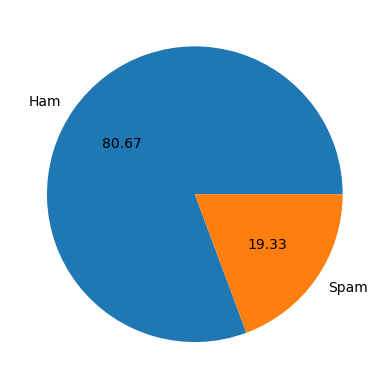

In [46]:
plt.pie(df['Label'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f")
plt.show()

In [47]:
# Applying the len function only to non-null values in the 'Body' column
df['Char_Count'] = df['Body'].apply(lambda x: len(str(x)))

df.head()

,Body,Label,Char_Count
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610
3,##############################################...,1,2863
4,I thought you might like these:\n1) Slim Down ...,1,641


In [48]:
df['Word_Count'] = df['Body'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,Body,Label,Char_Count,Word_Count
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113
3,##############################################...,1,2863,690
4,I thought you might like these:\n1) Slim Down ...,1,641,108


In [49]:
df['Sentence_Count'] = df['Body'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(10)

,Body,Label,Char_Count,Word_Count,Sentence_Count
4157,Takers galore possibly (me inclusive). Especia...,0,652,154,7
2686,"On Wednesday 28 August 2002 04:38 pm, Daniel Q...",0,1889,374,11
5602,"Hi the way I was with u 2day, is the normal wa...",0,142,41,3
8122,"Tonight? Yeah, I'd be down for that",0,35,10,2
3203,URL: http://scriptingnews.userland.com/backiss...,0,237,45,2
2685,Now that I have spam assassin and mailscanner ...,0,613,107,4
4047,-----BEGIN PGP SIGNED MESSAGE-----\nHash: SHA1...,0,1172,223,9
9780,Anything is valuable in only 2 situations: Fir...,0,98,18,1
9071,Lol its ok I didn't remember til last nite,0,42,10,1
10124,She.s fine. I have had difficulties with her p...,0,116,25,4


In [50]:
df[['Char_Count', 'Word_Count', 'Sentence_Count']].describe()

,Char_Count,Word_Count,Sentence_Count
count,10451.000000,10451.000000,10451.000000
mean,1025.336236,193.151086,7.456703
std,3836.664917,597.737250,20.694056
min,1.000000,0.000000,0.000000
25%,61.000000,14.000000,1.000000
50%,175.000000,37.000000,3.000000
75%,1017.000000,194.000000,7.000000
max,194978.000000,18564.000000,808.000000


In [51]:
df[df['Label'] == 0][['Char_Count', 'Word_Count', 'Sentence_Count']].describe()

,Char_Count,Word_Count,Sentence_Count
count,8431.000000,8431.000000,8431.000000
mean,870.170205,167.282766,6.294983
std,3530.808360,552.987072,18.419597
min,2.000000,1.000000,1.000000
25%,49.000000,12.000000,1.000000
50%,148.000000,31.000000,2.000000
75%,877.000000,173.500000,6.000000
max,194978.000000,18564.000000,808.000000


In [52]:
df[df['Label'] == 1][['Char_Count', 'Word_Count', 'Sentence_Count']].describe()

,Char_Count,Word_Count,Sentence_Count
count,2020.000000,2020.000000,2020.000000
mean,1672.962376,301.119307,12.305446
std,4859.606811,747.006606,27.762316
min,1.000000,0.000000,0.000000
25%,156.000000,32.000000,3.000000
50%,705.000000,123.500000,6.000000
75%,1507.500000,268.000000,11.000000
max,129635.000000,13288.000000,406.000000


<Axes: xlabel='Char_Count', ylabel='Count'>

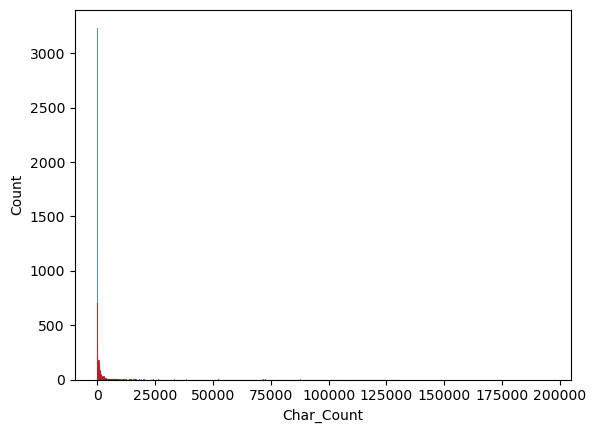

In [53]:
sns.histplot(df[df['Label'] == 0]['Char_Count'])
sns.histplot(df[df['Label'] == 1]['Char_Count'], color='red')

<Axes: xlabel='Word_Count', ylabel='Count'>

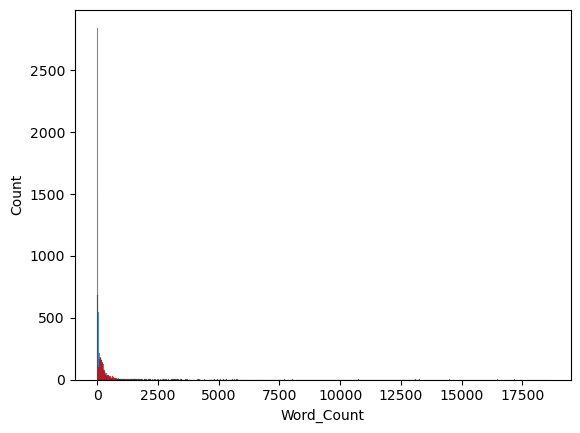

In [54]:
sns.histplot(df[df['Label'] == 0]['Word_Count'])
sns.histplot(df[df['Label'] == 1]['Word_Count'], color='red')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


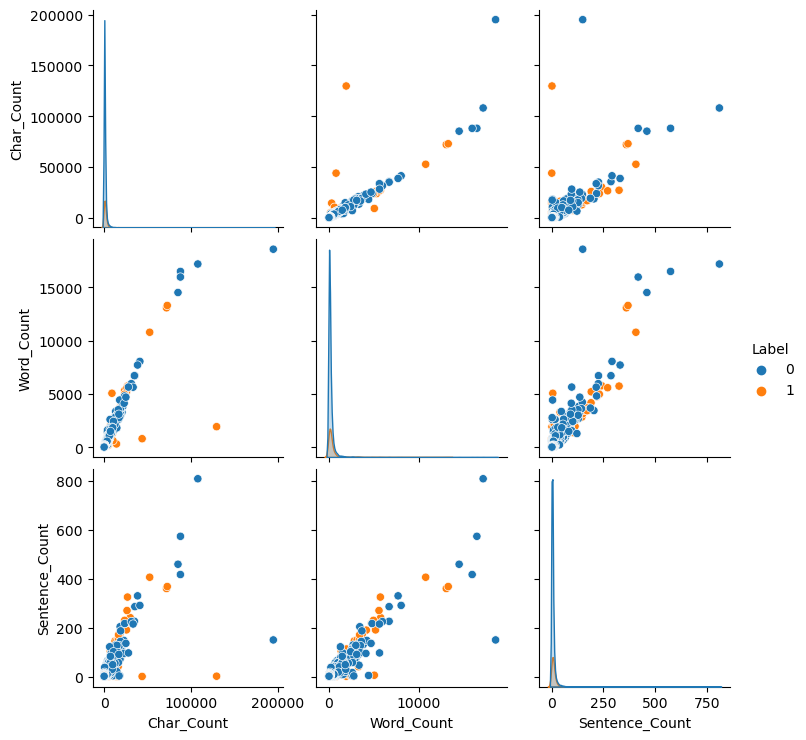

In [55]:
sns.pairplot(df,hue='Label')

In [56]:
#df.corr()

In [57]:
#sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing

In [58]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    word_list=[]

    for i in text:
        if i.isalnum():
            word_list.append(i)

    text = word_list[:]
    word_list.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            word_list.append(i)

    text = word_list[:]
    word_list.clear()

    for i in text:
        word_list.append(ps.stem(i))

    return " ".join(word_list)


In [59]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('playing')

'play'

In [62]:
transform_text("Cellular Phone Accessories All At Below Wholesale Prices!http://202.101.163.34:81/sites/merchant/sales/Hands Free Ear Buds 1.99! \nPhone Holsters 1.98! \nBooster Antennas Only $0.99\nPhone Cases 1.98! \nCar Chargers 1.98! \nFace Plates As Low As 0.99! \nLithium Ion Batteries As Low As 6.94! http://202.101.163.34:81/sites/merchant/sales/Click Below For Accessories On All NOKIA, MOTOROLA LG, NEXTEL, \nSAMSUNG, QUALCOMM, ERICSSON, AUDIOVOX PHONES At Below \nWHOLESALE PRICES!http://202.101.163.34:81/sites/merchant/sales/***If You Need Assistance Please Call Us (732) 751-1457***\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nTo be removed from future mailings please send your remove \nrequest to: removemenow68994@btamail.net.cn \nThank You and have a super day :)")

'cellular phone accessori wholesal price http free ear bud phone holster booster antenna phone case car charger face plate low lithium ion batteri low http accessori nokia motorola lg nextel samsung qualcomm ericsson audiovox phone wholesal price http need assist pleas call us 732 remov futur mail pleas send remov request removemenow68994 thank super day'

In [63]:
df['Body'][10]

'Cellular Phone Accessories All At Below Wholesale Prices!http://202.101.163.34:81/sites/merchant/sales/Hands Free Ear Buds 1.99! \nPhone Holsters 1.98! \nBooster Antennas Only $0.99\nPhone Cases 1.98! \nCar Chargers 1.98! \nFace Plates As Low As 0.99! \nLithium Ion Batteries As Low As 6.94! http://202.101.163.34:81/sites/merchant/sales/Click Below For Accessories On All NOKIA, MOTOROLA LG, NEXTEL, \nSAMSUNG, QUALCOMM, ERICSSON, AUDIOVOX PHONES At Below \nWHOLESALE PRICES!http://202.101.163.34:81/sites/merchant/sales/***If You Need Assistance Please Call Us (732) 751-1457***\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nTo be removed from future mailings please send your remove \nrequest to: removemenow68994@btamail.net.cn \nThank You and have a super day :)'

In [64]:
df['Transformed_Body'] = df['Body'].apply(transform_text)

In [65]:
df.sample(10)

,Body,Label,Char_Count,Word_Count,Sentence_Count,Transformed_Body
2204,"Uh, WWII Enigma was cracked at Bletchly Park, ...",0,775,142,6,uh wwii enigma crack bletchli park base work p...
4573,ThosStew@aol.com writes:> In a message dated 7...,0,1425,275,9,thosstew write messag date pm dl write will co...
4934,Hi.Dave Cridland wrote:> > recommends *agains...,0,671,131,3,cridland wrote recommend use configur tri supp...
7875,What i mean is do they come chase you out when...,0,113,27,1,mean come chase state watch mani movi want
208,This email is being sent to zzzz@jmason.org. T...,1,5467,928,37,email sent zzzz unsubscrib pleas visit http ev...
1732,We met a family in our parent-baby group with ...,0,801,182,6,met famili group son born minut daughter unlik...
705,How would you like a 100% tax free Investment ...,1,591,85,3,would like 100 tax free invest oil ga well mak...
6321,I'm at work. Please call,0,24,7,2,work pleas call
10282,Good day to You too.Pray for me.Remove the tee...,0,88,16,1,good day teeth pain maintain stuff
207,Would you like to know what the Powerball Winn...,1,637,116,4,would like know powerbal win lotteri number mo...


In [66]:
#conda install -c conda-forge wordcloud=1.9.2

In [67]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [68]:
spam_wc = wc.generate(df[df['Label'] == 1]['Transformed_Body'].str.cat(sep = " "))

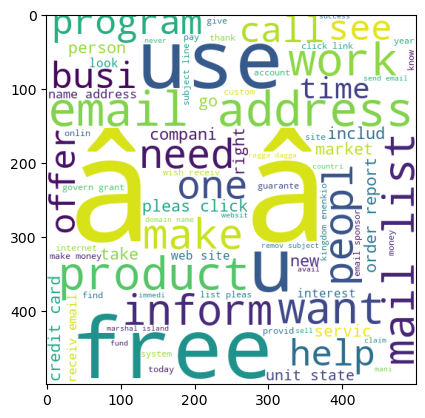

In [69]:
plt.imshow(spam_wc)

In [70]:
ham_wc = wc.generate(df[df['Label'] == 0]['Transformed_Body'].str.cat(sep = " "))

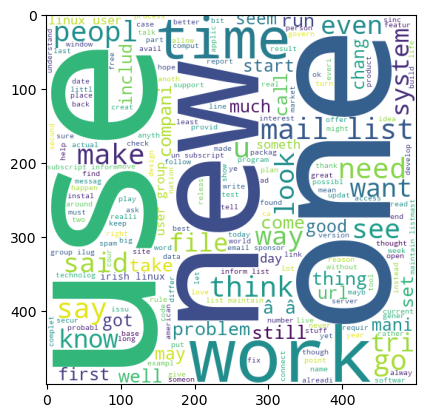

In [71]:
plt.imshow(ham_wc)

In [72]:
df.head()

,Body,Label,Char_Count,Word_Count,Sentence_Count,Transformed_Body
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,##############################################...,1,2863,690,35,adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,1,641,108,4,thought might like 1 slim guarante lose lb 30 ...


In [73]:
df[df['Label'] == 1]

,Body,Label,Char_Count,Word_Count,Sentence_Count,Transformed_Body
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,##############################################...,1,2863,690,35,adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,1,641,108,4,thought might like 1 slim guarante lose lb 30 ...
...,...,...,...,...,...,...
10419,Want explicit SEX in 30 secs? Ring 02073162414...,1,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
10421,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
10428,Had your contract mobile 11 Mnths? Latest Moto...,1,160,35,5,contract mobil 11 mnth latest motorola nokia e...
10445,REMINDER FROM O2: To get 2.50 pounds free call...,1,147,30,1,remind o2 get pound free call credit detail gr...


In [74]:
spam_corpus = []
for sentence in df[df['Label'] == 1]['Transformed_Body'].tolist():
    for word in sentence.split():
        spam_corpus.append(word)

In [75]:
len(spam_corpus)

262191

In [76]:
from collections import Counter
common_words = Counter(spam_corpus).most_common(30)

In [77]:
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

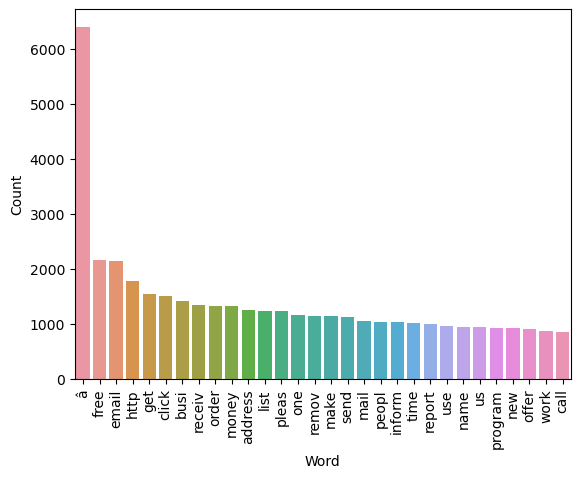

In [78]:
sns.barplot(x='Word', y='Count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [79]:
ham_corpus = []
for sentence in df[df['Label'] == 0]['Transformed_Body'].tolist():
    for word in sentence.split():
        ham_corpus.append(word)

In [80]:
common_words = Counter(ham_corpus).most_common(30)

In [81]:
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

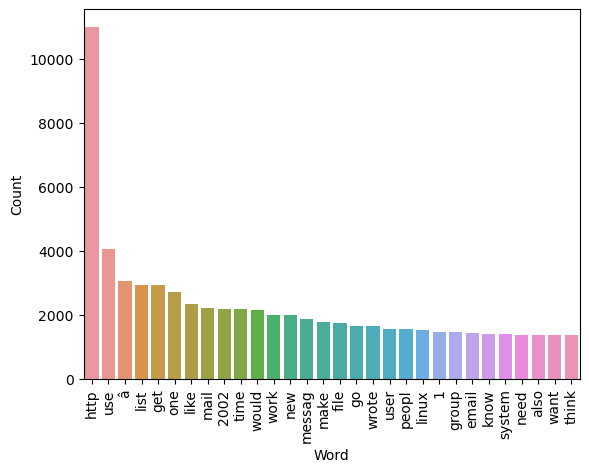

In [82]:
sns.barplot(x='Word', y='Count', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [83]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [84]:
X = tf.fit_transform(df['Transformed_Body']).toarray()

In [85]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
X.shape

(10451, 39667)

In [87]:
y = df['Label'].values

In [88]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.7790530846484935
0.4554054054054054
[[1292  403]
 [  59  337]]


In [94]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9067431850789096
1.0
[[1695    0]
 [ 195  201]]


In [95]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.8699186991869918
0.7198581560283688
[[1616   79]
 [ 193  203]]


In [96]:
# tfidf mnb

In [97]:
#conda install -c conda-forge xgboost

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [99]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb = XGBClassifier(n_estimators=50,random_state=2)

In [100]:
classifiers = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'ETC': etc,
    'GBDT':gbdt,
    #'xgb':xgb
}

In [101]:
def train_classifier(classifiers,X_train,y_train,X_test,y_test):
    classifiers.fit(X_train,y_train)
    y_pred = classifiers.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [102]:
#train_classifier(svc,X_train,y_train,X_test,y_test)

In [103]:
#accuracy_scores = []
#precision_scores = []

#for name,classifier in classifiers.items():

 #   current_accuracy,current_precision = train_classifier(classifier, X_train,y_train,X_test,y_test)

  #  print("For ",name)
  #  print("Accuracy - ",current_accuracy)
  #  print("Precision - ",current_precision)

   # accuracy_scores.append(current_accuracy)
   # precision_scores.append(current_precision)

In [104]:
#classifiers

In [105]:
#performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [106]:
#performance_df

In [107]:
#performance_df1 = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [108]:
#performance_df1

In [109]:
#performance_df2 = pd.melt(performance_df, id_vars = "Algorithm")

In [110]:
#sns.catplot(x = 'Algorithm', y='value',
#               hue = 'variable',data=performance_df2, kind='bar',height=5)
#plt.ylim(0.5,1.0)
#plt.xticks(rotation='vertical')
#plt.show()

In [111]:
# voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [112]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('etc',etc)],voting='soft')

In [113]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [114]:
y_pred = voting.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9708273553323769
1.0
[[1695    0]
 [  61  335]]


In [123]:
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [125]:
etc.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [115]:
# export part

In [126]:
with open('etc_model.pkl', 'wb') as file:
    pickle.dump(etc, file)

In [127]:
with open('etc_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [130]:

input_email=input("Enter Your Email:")
transformed_email=transform_text(input_email)
#print(transformed_email)
vector_input1 = tfidf.transform([transformed_email]).toarray()
#result = model.predict(vector_input)[0]
predictions = loaded_model.predict(vector_input1)[0]
if predictions==1:
  print("Spam")
else:
  print("Ham")
probabilities = model.predict_proba(vector_input)[0]
probability_spam = probabilities[1]  # Probability of being spam

# Display prediction and probability
if probability_spam >= 0.5:
    print(f'The email is predicted to be spam with probability {probability_spam:.2%}.')
else:
    print(f'The email is predicted to be non-spam with probability {(1 - probability_spam):.2%}.')

Enter Your Email:helo
Ham
The email is predicted to be non-spam with probability 85.36%.


In [116]:
import pickle

pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))

In [117]:
# input part

In [118]:
import pickle

tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [119]:
import pickle
import joblib

# Dump the loaded objects to joblib format
joblib.dump(tf, 'vectorizer.joblib')
joblib.dump(voting, 'model.joblib')


['model.joblib']

In [120]:
input_email=input("Enter Your Email:")
transformed_email=transform_text(input_email)
#print(transformed_email)
vector_input = tfidf.transform([transformed_email]).toarray()
result = model.predict(vector_input)[0]
if result==1:
  print("Spam")
else:
  print("Ham")
probabilities = model.predict_proba(vector_input)[0]
probability_spam = probabilities[1]  # Probability of being spam

# Display prediction and probability
if probability_spam >= 0.5:
    print(f'The email is predicted to be spam with probability {probability_spam:.2%}.')
else:
    print(f'The email is predicted to be non-spam with probability {(1 - probability_spam):.2%}.')

Enter Your Email:helo
Ham
The email is predicted to be non-spam with probability 85.36%.


In [121]:
probabilities = model.predict_proba(vector_input)[0]
probability_spam = probabilities[1]  # Probability of being spam

# Display prediction and probability
if probability_spam >= 0.5:
    print(f'The email is predicted to be spam with probability {probability_spam:.2%}.')
else:
    print(f'The email is predicted to be non-spam with probability {(1 - probability_spam):.2%}.')

The email is predicted to be non-spam with probability 85.36%.


In [122]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Users/heramb/anaconda3/lib/python3.11/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
